<a href="https://colab.research.google.com/github/jiverse/Sentimental-Analysis-using-NLP/blob/main/SA_Using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import string
import nltk

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Twitter Sentiments.csv")
df.head()

# here label 0 indicates it is not a hate tweet and label 1 indicates it is a hate tweet

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
# define a function to remove patterns
def remove_pattern(input_txt,pattern):
  r = re.findall(pattern,input_txt)
  for word in r:
    input_txt = re.sub(word,"",input_txt)
  return input_txt

In [7]:
# to remove twitter handles
df['clean_tweet']=np.vectorize(remove_pattern)(df['tweet'], "@\w+")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [8]:
# to remove numbers,special characters and others
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]"," ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [9]:
# to remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: society #motivation


tokenization


In [10]:
# converting a sentence into individual words(tokens)
tokenized_tweet = df['clean_tweet'].apply(lambda x:x.split())
tokenized_tweet.head()

,clean_tweet
0,"[when, father, dysfunctional, selfish, drags, ..."
1,"[thanks, #lyft, credit, can't, cause, they, do..."
2,"[bihday, your, majesty]"
3,"[#model, love, take, with, time, urð±!!!, ð..."
4,"[factsguide:, society, #motivation]"


In [11]:
# stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

,clean_tweet
0,"[when, father, dysfunct, selfish, drag, kid, i..."
1,"[thank, #lyft, credit, can't, caus, they, don'..."
2,"[bihday, your, majesti]"
3,"[#model, love, take, with, time, urð±!!!, ð..."
4,"[factsguide:, societi, #motiv]"


In [12]:
# combining all tokens into a single string
for i in range(len(tokenized_tweet)):
  tokenized_tweet[i] = " ".join(tokenized_tweet[i])

df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't caus they don't offer...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: societi #motiv


In [13]:
!pip install wordcloud

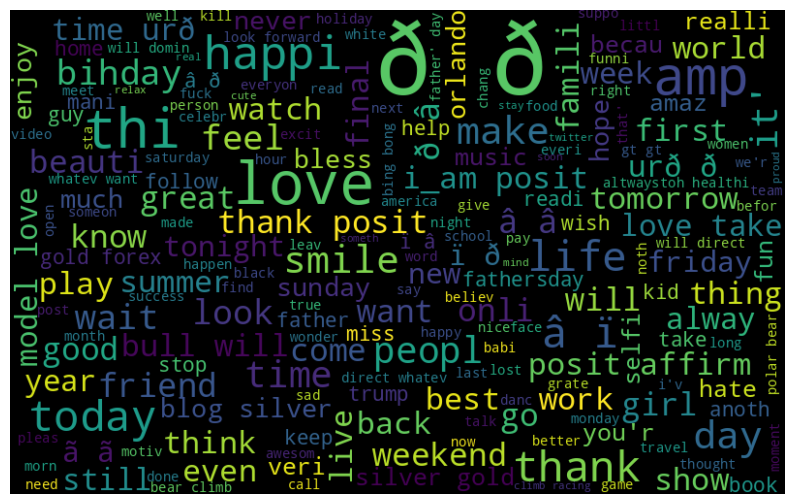

In [14]:
# display frequent words
all_words = " ".join([sentence for sentence in df["clean_tweet"]])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

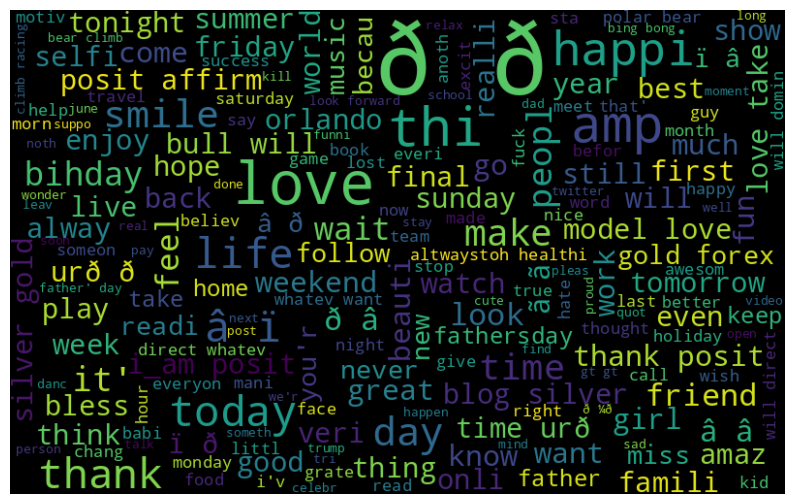

In [15]:
# display frequent positive words
all_words = " ".join([sentence for sentence in df["clean_tweet"][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

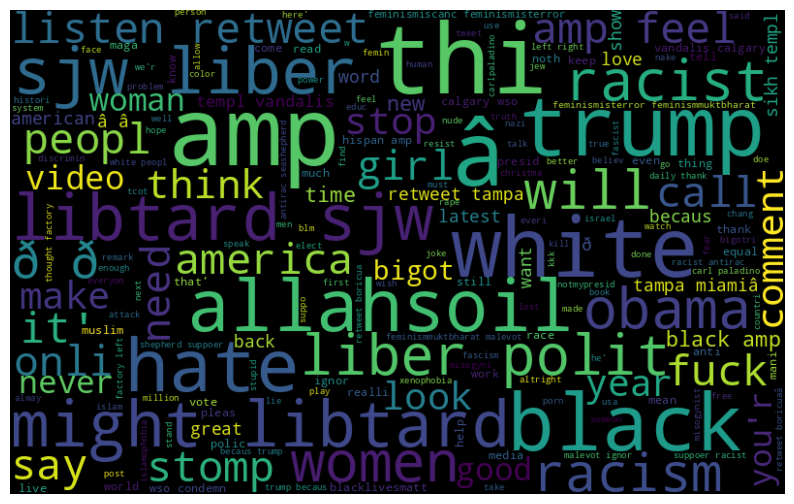

In [16]:
# display frequent negative words
all_words = " ".join([sentence for sentence in df["clean_tweet"][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [17]:
# extracting the hashtag
def hashtag_extract(tweets):
  hashtags = []
  for tweet in tweets:
    ht = re.findall(r"#(\w+)", tweet)
    hashtags.append(ht)
  return hashtags

In [18]:
# extract negative hashtags
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

# extract positive hashtags
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

In [19]:
# combining all hashtags into a singe list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [20]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                                'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,70
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,374


<Axes: xlabel='Hashtag', ylabel='Count'>

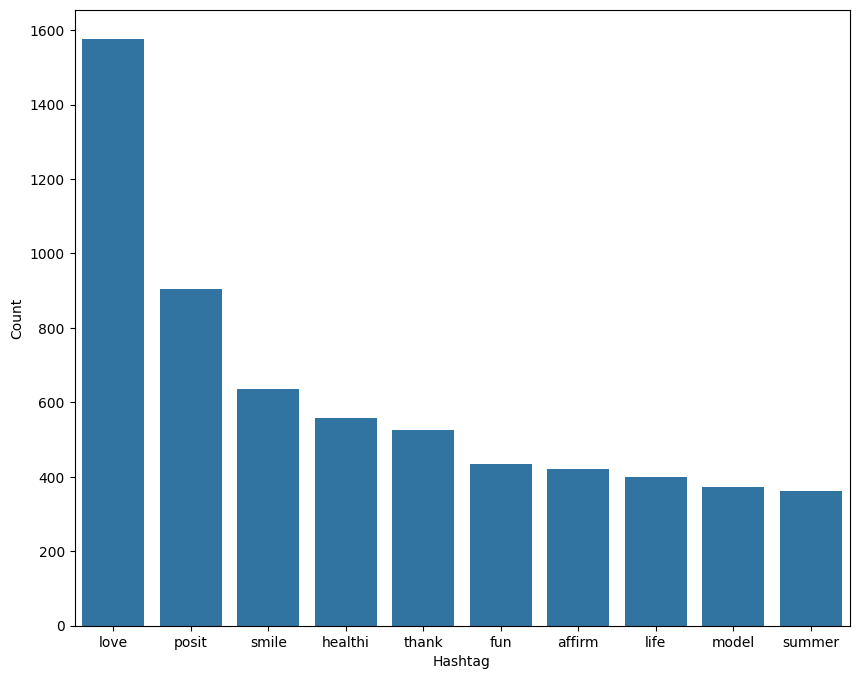

In [21]:
# top 10 positive hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(10,8))
sns.barplot(data=d, x='Hashtag', y='Count')

In [22]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                                'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2


<Axes: xlabel='Hashtag', ylabel='Count'>

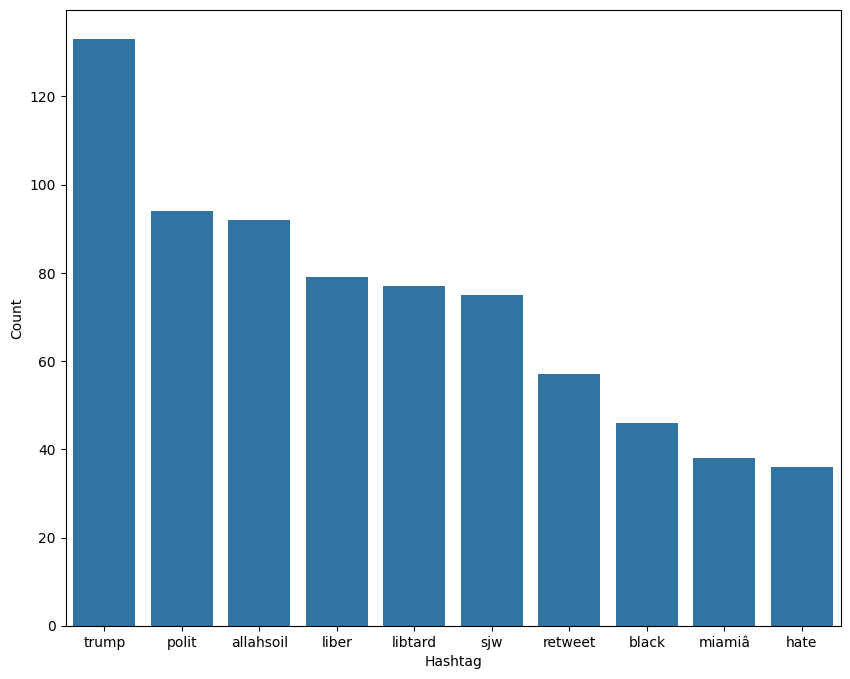

In [23]:
# top 10 negative hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(10,8))
sns.barplot(data=d, x='Hashtag', y='Count')

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.9,min_df=2,max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

# bag of words
bow

<31962x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 123392 stored elements in Compressed Sparse Row format>

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.2)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [27]:
model_1 = LogisticRegression()
model_1.fit(x_train,y_train)

LogisticRegression()

In [28]:
pred_1 = model_1.predict(x_test)
print(f1_score(y_test,pred_1))
print(accuracy_score(y_test,pred_1))

0.49411764705882355
0.9461911465665571


In [29]:
model_2 = SVC()
model_2.fit(x_train,y_train)

SVC()

In [30]:
pred_2 = model_2.predict(x_test)
print(f1_score(y_test,pred_2))
print(accuracy_score(y_test,pred_2))

0.4723926380368098
0.9461911465665571


In [31]:
model_3 = DecisionTreeClassifier()
model_3.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
pred_3 = model_3.predict(x_test)
print(f1_score(y_test,pred_3))
print(accuracy_score(y_test,pred_3))

0.4782608695652174
0.9211637728765838


In [33]:
# convert the sparse matrix x_train,x_test to a dense numpy array
x_train_dense = x_train.toarray()
x_test_dense = x_test.toarray()

# create and fit the GaussianNB model
model_4 = GaussianNB()
model_4.fit(x_train_dense, y_train)

GaussianNB()

In [34]:
pred_4 = model_4.predict(x_test_dense)
print(f1_score(y_test,pred_4))
print(accuracy_score(y_test,pred_4))

0.22204888195527822
0.5319881119974973


In [35]:
# using probability to predict
pred_prob = model_1.predict_proba(x_test)
pred  = pred_prob[:,1] >=0.3
pred = pred.astype(int)

f1_score(y_test,pred)

0.5790754257907542